In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# Load Database
df=pd.read_csv('ipl_matches.csv')
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
# Copy database
df1=df.copy()
df1

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
# Column type check
df1.dtypes.to_frame()

,0
id,int64
Season,object
city,object
date,object
team1,object
team2,object
toss_winner,object
toss_decision,object
result,object
dl_applied,int64


In [5]:
# Remove Unwanted
list1=['id','Season','date','umpire1','umpire2','umpire3']

In [6]:
df1.drop(axis=0,columns=list1,inplace=True)

In [7]:
# Remove null values
df1.dropna(axis=0,inplace=True)

In [8]:
df1.dtypes

city               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
dtype: object

In [9]:
df1.isnull().sum()

city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

### EDA

In [10]:
# Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [11]:
df1['toss_decision'].value_counts()

toss_decision
field    456
bat      289
Name: count, dtype: int64

In [12]:
le=LabelEncoder()
df1['toss_decision_en']=le.fit_transform(df1['toss_decision'])

In [13]:
df1['result_label']=le.fit_transform(df1['result'])

In [14]:
df1['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [15]:
df1.replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Pune Warriors': 'Rising Pune Supergiants',
    'Rising Pune Supergiant': 'Rising Pune Supergiants'
},inplace=True)

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')
df1.replace({'Mumbai Indians':0,
            'Chennai Super Kings':1,
            'Kolkata Knight Riders':2,
            'Sunrisers Hyderabad':3,
            'Royal Challengers Bangalore':4,
            'Kings XI Punjab':5,
            'Delhi Capitals':6,
            'Rajasthan Royals':7,
            'Rising Pune Supergiants':8,
            'Gujarat Lions':9,
            'Kochi Tuskers Kerala':10},inplace=True)

In [17]:
df1['toss_winner'].value_counts()

toss_winner
0     96
2     91
6     89
1     89
3     88
5     80
4     79
7     77
8     33
9     15
10     8
Name: count, dtype: int64

In [ ]:
toss_winner_label.columns=[['Mumbai','Kolkata','Chennai','Delhi','Sunrisers','Punjab','Bangalore','Rajasthan','Pune',
                            'Gujarat','Kerala']]

In [ ]:
toss_winner_label

In [18]:
df1.drop(axis=0,columns='toss_decision',inplace=True)

In [19]:
df1.drop(axis=0,columns='result',inplace=True)

In [20]:
df1.drop(axis=0,columns='player_of_match',inplace=True)

In [21]:
df1.describe()

,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,toss_decision_en,result_label
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,3.688591,3.948993,3.762416,0.025503,3.554362,13.444295,3.369128,0.612081,0.012081
std,2.565212,2.576272,2.609677,0.157754,2.583042,23.599650,3.391460,0.487603,0.109319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,0.000000,3.000000,0.000000,4.000000,1.000000,0.000000
75%,6.000000,6.000000,6.000000,0.000000,6.000000,19.000000,6.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,1.000000,10.000000,146.000000,10.000000,1.000000,1.000000


In [22]:
df1.dtypes

city                object
team1                int64
team2                int64
toss_winner          int64
dl_applied           int64
winner               int64
win_by_runs          int64
win_by_wickets       int64
venue               object
toss_decision_en     int64
result_label         int64
dtype: object

In [23]:
df1['result_label'].value_counts()

result_label
0    736
1      9
Name: count, dtype: int64

In [24]:
data=df1['city'].unique()
len(df1['city'].unique())

32

In [25]:
list2={x:y for y,x in enumerate(data)}
df1['city'].replace(list2,inplace=True)

In [26]:
data2=df1['venue'].unique()

In [27]:
list3={x:y for y,x in enumerate(data2)}
df1['venue'].replace(list3,inplace=True)

In [28]:
df1['venue']

0       0
1       1
2       2
3       3
4       4
       ..
751     5
752    34
753    39
754    39
755    37
Name: venue, Length: 745, dtype: int64

In [29]:
df1

,city,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,venue,toss_decision_en,result_label
0,0,3,4,4,0,3,35,0,0,1,0
1,1,0,8,8,0,8,0,7,1,1,0
2,2,9,2,2,0,2,0,10,2,1,0
3,3,8,5,5,0,5,0,6,3,1,0
4,4,4,6,4,0,4,15,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
751,5,2,0,0,0,0,0,9,5,1,0
752,11,1,0,1,0,0,0,6,34,0,0
753,25,3,6,6,0,6,0,2,39,1,0
754,25,6,1,1,0,1,0,6,39,1,0


In [30]:
corr=df1.corr()

<Axes: >

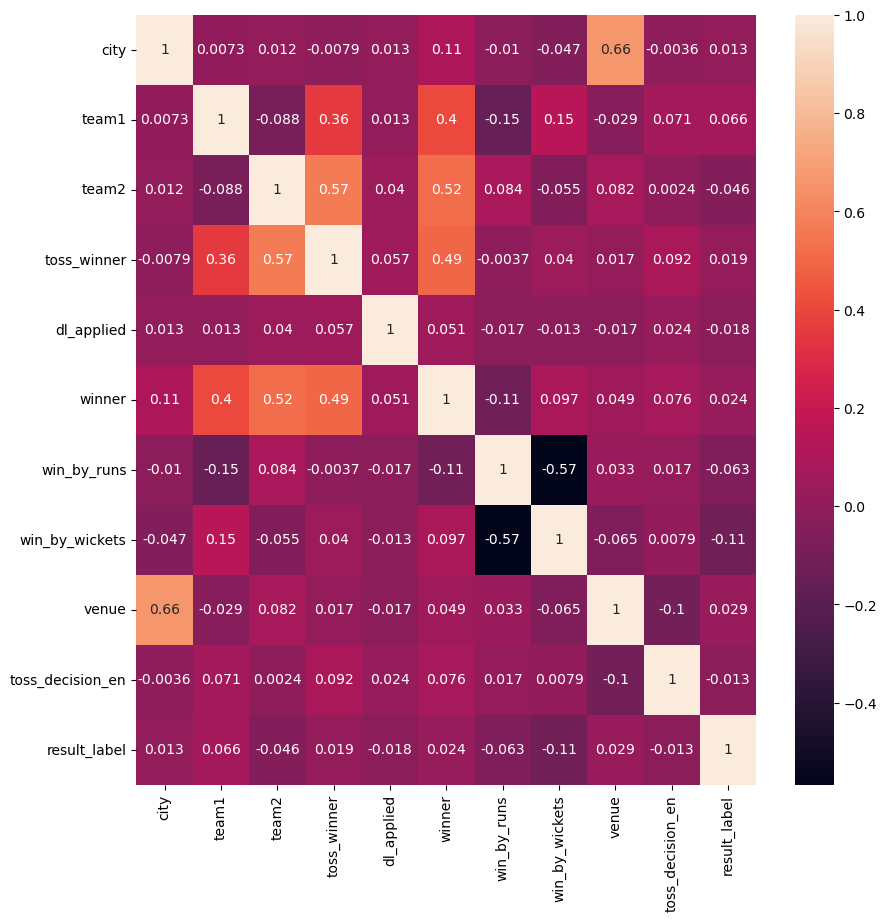

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [32]:
df1.describe()

,city,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,venue,toss_decision_en,result_label
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,8.971812,3.688591,3.948993,3.762416,0.025503,3.554362,13.444295,3.369128,11.467114,0.612081,0.012081
std,7.677156,2.565212,2.576272,2.609677,0.157754,2.583042,23.599650,3.391460,9.935102,0.487603,0.109319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,7.000000,3.000000,4.000000,4.000000,0.000000,3.000000,0.000000,4.000000,7.000000,1.000000,0.000000
75%,11.000000,6.000000,6.000000,6.000000,0.000000,6.000000,19.000000,6.000000,15.000000,1.000000,0.000000
max,31.000000,10.000000,10.000000,10.000000,1.000000,10.000000,146.000000,10.000000,39.000000,1.000000,1.000000


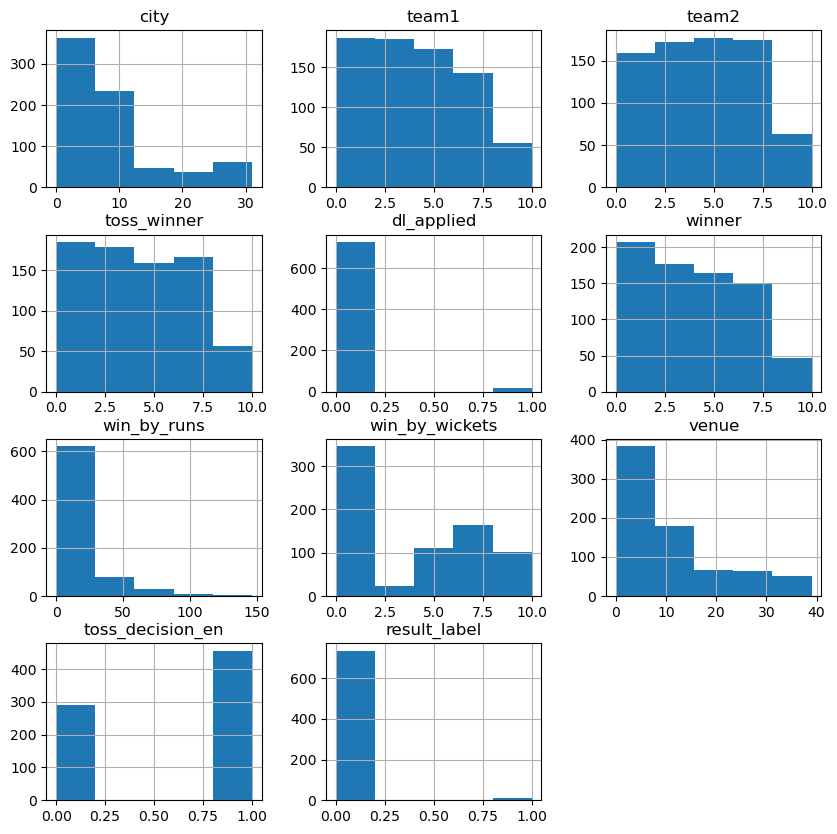

In [33]:
df1.hist(figsize=(10,10),bins=5)
plt.show()

In [34]:
x=df1.drop('winner',axis=1)

In [35]:
y=df1['winner']

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"x-train : {x_train.shape}")
print(f"x-test : {x_test.shape}")
print(f"y-train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x-train : (596, 10)
x-test : (149, 10)
y-train : (596,)
y_test : (149,)


In [37]:
scaler=MinMaxScaler()
x_train_scler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [38]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42, max_iter = 200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [39]:
y_pred = model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [41]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[13  2  3  1  0  0  0  0  0  1]
 [13  3  5  1  0  2  0  1  0  0]
 [ 5  1  6  2  2  1  0  0  1  0]
 [ 1  5  0  4  0  1  1  2  1  0]
 [ 3  4  4  2  1  2  0  4  0  1]
 [ 1  0  0  3  2  1  1  2  0  0]
 [ 0  0  3  4  2  1  1  4  0  0]
 [ 0  0  1  1  1  2  4  6  1  2]
 [ 0  0  1  0  0  0  1  1  1  1]
 [ 0  0  0  0  0  0  0  1  1  0]]

Accuracy Score : 24.16 %


In [42]:
predit=model.predict([[25,6,1,0,1,0,6,39,1,0]])
predit

array([2])

In [75]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred = dt.predict(x_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[20  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  1  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  1  0 14  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  1  0  0  0]
 [ 0  0  0  0  0  9  0  0  1  0]
 [ 0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  2]]

Accuracy Score : 95.3 %


In [46]:
predit=dt.predict([[25,6,1,0,1,0,6,39,1,0]])
predit

array([1])

In [47]:
from sklearn.metrics import r2_score
print(f"r2_score :{round(r2_score(y_test,y_pred)*100,2)}")

r2_score :97.15


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = rf.predict(x_test)

In [51]:

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[20  0  0  0  0  0  0  0  0  0]
 [ 2 20  2  1  0  0  0  0  0  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  1 13  0  1  0  0  0  0]
 [ 0  1  0  3 13  4  0  0  0  0]
 [ 0  0  1  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  0  2  0  2 14  0  0]
 [ 0  0  0  0  0  0  0  3  2  0]
 [ 0  0  0  0  0  0  0  0  1  1]]

Accuracy Score : 82.55 %


In [52]:
predit=rf.predict([[25,6,1,0,1,0,6,39,1,0]])
predit

array([1])

In [53]:
from sklearn.neighbors import KNeighborsClassifier 

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
# Model Prediction

y_pred = KNN.predict(x_test)

In [55]:
# Confusion Matrix and Accuracy Score:

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[10  6  3  1  0  0  0  0  0  0]
 [ 8 11  4  1  1  0  0  0  0  0]
 [ 3  1  9  4  1  0  0  0  0  0]
 [ 2  4  3  5  0  1  0  0  0  0]
 [ 2  3  5  3  4  2  2  0  0  0]
 [ 1  0  2  1  3  2  1  0  0  0]
 [ 0  3  2  0  0  3  4  3  0  0]
 [ 0  0  0  1  1  6  4  5  1  0]
 [ 0  0  1  0  0  1  0  1  0  2]
 [ 0  0  0  0  0  0  1  0  0  1]]

Accuracy Score : 34.23 %


In [56]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(x_train, y_train)

SVC()

In [57]:
# Model Prediction

y_pred = SVM.predict(x_test)

In [58]:
# Confusion Matrix and Accuracy Score:

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[12  2  3  2  0  1  0  0  0  0]
 [ 9  9  3  1  0  3  0  0  0  0]
 [ 7  2  6  1  0  2  0  0  0  0]
 [ 2  6  1  4  0  2  0  0  0  0]
 [ 6  4  3  2  0  5  0  1  0  0]
 [ 3  0  0  2  0  2  0  3  0  0]
 [ 1  1  1  5  2  3  0  2  0  0]
 [ 1  2  0  3  2  2  2  6  0  0]
 [ 1  0  0  1  0  0  1  2  0  0]
 [ 0  0  0  0  1  0  0  1  0  0]]

Accuracy Score : 26.17 %


In [61]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
y_pred = xg.predict(x_test)

In [79]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[20  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  1]
 [ 0  0  0  1 20  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  1 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]

Accuracy Score : 97.99 %


In [64]:
from sklearn.naive_bayes import GaussianNB

Naive = GaussianNB()
Naive.fit(x_train, y_train)

GaussianNB()

In [65]:
y_pred = Naive.predict(x_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[12  3  0  0  0  0  2  1  0  0  2]
 [12  6  0  0  0  0  3  0  1  0  3]
 [ 8  1  1  0  0  0  2  0  0  0  6]
 [ 3  5  0  0  2  0  2  0  0  0  3]
 [ 4  4  3  0  0  0  2  1  1  0  6]
 [ 1  0  0  0  1  0  1  1  0  0  6]
 [ 1  3  0  0  2  0  2  1  0  1  5]
 [ 0  0  0  0  4  0  7  0  0  7  0]
 [ 1  0  0  0  0  0  2  0  0  2  0]
 [ 0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]

Accuracy Score : 14.77 %


In [68]:

from warnings import filterwarnings
filterwarnings('ignore')

model = LogisticRegression(random_state = 42, max_iter = 200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [69]:
y_pred = model.predict(x_test)

In [70]:

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print(f"Confusion Matrix :\n {cm}")
print()
print(f"Accuracy Score : {round(accuracy*100,2)} %")

Confusion Matrix :
 [[13  2  3  1  0  0  0  0  0  1]
 [13  3  5  1  0  2  0  1  0  0]
 [ 5  1  6  2  2  1  0  0  1  0]
 [ 1  5  0  4  0  1  1  2  1  0]
 [ 3  4  4  2  1  2  0  4  0  1]
 [ 1  0  0  3  2  1  1  2  0  0]
 [ 0  0  3  4  2  1  1  4  0  0]
 [ 0  0  1  1  1  2  4  6  1  2]
 [ 0  0  1  0  0  0  1  1  1  1]
 [ 0  0  0  0  0  0  0  1  1  0]]

Accuracy Score : 24.16 %


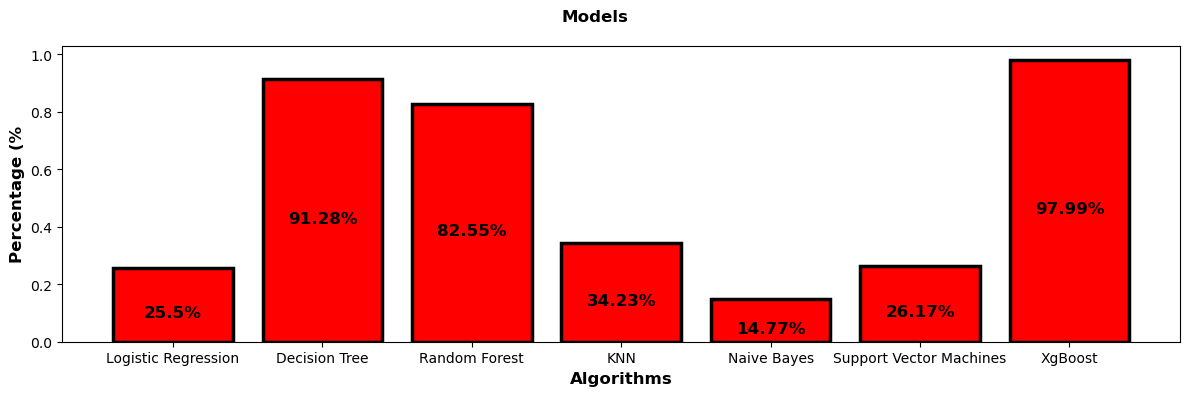

In [80]:
import seaborn as sns
models = {

    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machines' : SVC(),
    'XgBoost' : XGBClassifier()
}

acc = {name:accuracy_score(y_test, model.fit(x_train,y_train).predict(x_test))
      for name, model in models.items()}


plt.figure(figsize=(12, 4))
plt.bar(acc.keys(), acc.values(), color = 'red', edgecolor = 'black', lw = 2.5)

for i, (name, val) in enumerate(acc.items()):
    plt.text(i, val / 2, f'{round(val*100,2)}%',ha = 'center', va = 'top',
            fontsize = 12, fontweight = 'bold')

plt.xlabel('Algorithms', fontsize = 12, fontweight = 'bold')
plt.ylabel('Percentage (%', fontsize = 12, fontweight = 'bold')
plt.suptitle('Models', fontsize = 12, fontweight = 'bold')

plt.tight_layout()